# Lecture 00. Serial 통신 이해 하기

### Contents:
   
   1. Lecture 00 개요
   
   2. Communication Protocol 이해하기
   
   3. Pyserial 라이브러리를 사용하여 Board Control 하기
   
   4. PyQT5를 사용하여 UI제작하기
   
   ---
   

---
## **1. Lecture 00 개요**


이번 강의에서는 Serial 통신(Uart)를 이해하고 하드웨어와 PC간의 통신을 이해할 수 있다.  <p>

이번 강의에서는:<p>
- 직렬통신과 병렬통신을 이해하고 Communication Protocol을 이해할 수 있다.
- Pyserial Library를 통해 파이썬코드를 통한 시리얼 통신을 할 수 있다.

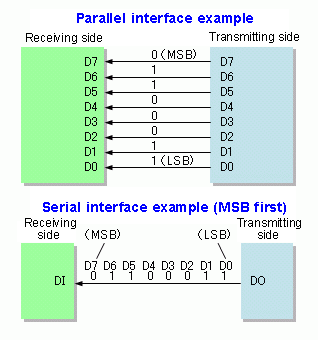

In [3]:
from IPython.display import Image
Image("RES/parVSser.png")

## UART
UART는 비동기적인 직렬통신 방법입니다.

- UART(범용 비동기화 송수신기: Universal asynchronous receiver/transmitter)는 병렬 데이터의 형태를 직렬 방식으로 전환하여 데이터를 전송하는 컴퓨터 하드웨어의 일종.

- 비동기 통신이므로 동기 신호가 전달되지 않는다. 따라서 수신 쪽에서 동기신호를 찾아내어 데이터의 시작과 끝을 시간적으로 알아 처리할 수 있도록 약속되어 있습니다.

## **2. Communication Protocol 이해하기**
xlsx 파일 참조

---
## **3. Pyserial 라이브러리를 사용하여 Board Control 하기**


- Pyserial 라이브러리를 설치
- Board로 데이터 보내기

In [10]:
import serial

COM 포트 확인
- 시작 --> 장치관리자 --> 포트 를 확인하여 COMx 포트번호 확인

In [16]:
PORT = 'COM3'  # PC에 연결된 포트
baud = 19200  # 보드레이트
ser = serial.Serial(PORT, baud, timeout=1)
startBit = 0xAA


### 컨베이어 Start Code 작성하기
- data =[0xAA,0x05, 0x01, 0x01, 0xF8]

In [18]:

# main & sub command 작성하기
main_command = 0x01
sub_command = 0x01
# 기기로 보낼 패킷 구성
packet = bytearray()
packet.append(startBit)
data = [main_command, sub_command]
length = len(data) + 0x03
packet.append(length)
for d in data:
    packet.append(d)
checksum =~(length + sum(data)) & 0xFF
packet.append(checksum)
print(packet)

bytearray(b'\xaa\x05\x01\x01\xf8')


In [19]:
ser.write(packet)

5

### 컨베이어 Stop Code 작성하기
- data =[0xAA,0x05, 0x01, 0x00, 0xF9]

In [22]:
main_command = 0x01
sub_command = 0x00
packet = bytearray()
packet.append(startBit)
data = [main_command, sub_command]
length = len(data) + 0x03
packet.append(length)
for d in data:
    packet.append(d)
checksum = ~(length + sum(data)) & 0xFF
packet.append(checksum)
print(packet)

bytearray(b'\xaa\x05\x01\x00\xf9')


5

In [23]:
ser.write(packet)

5

### 분류기 A, B, C 작성하기

### 벨트 Speed up, down 작성하기

In [26]:
# Speed UP
main_command = 0x04
sub_command = 0x01
packet = bytearray()
packet.append(startBit)
data = [main_command, sub_command]
length = len(data) + 0x03
packet.append(length)
for d in data:
    packet.append(d)
checksum = ~(length + sum(data)) & 0xFF
packet.append(checksum)
print(packet)
ser.write(packet)

bytearray(b'\xaa\x05\x04\x01\xf5')


5

In [27]:
main_command = 0x04
sub_command = 0x02
packet = bytearray()
packet.append(startBit)
data = [main_command, sub_command]
length = len(data) + 0x03
packet.append(length)
for d in data:
    packet.append(d)
checksum = ~(length + sum(data)) & 0xFF
packet.append(checksum)
print(packet)
ser.write(packet)

bytearray(b'\xaa\x05\x04\x02\xf4')


5

## **5. 실행파일 만들기**
sf_control.py , ui 파일을 이용하여 만들기